In [3]:
%load_ext autoreload
%autoreload 2
# folder path
import os
dir_path = "C://Users//vnarv//PycharmProjects//scoring_SDA/data/"
os.chdir("C://Users//vnarv//PycharmProjects//scoring_SDA/")

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score
)
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from conf.config import data_inputs_paths as data_inputs


##################### base line model ###########
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from conf.config import model_config
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier
)
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
# Package xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.svm import SVC
import time

from sklearn.feature_selection import VarianceThreshold, RFECV, SelectKBest, chi2, mutual_info_classif
# Package pour représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [5]:
from src.preprocessing.preprocessing_x import PreprocessData
from src.preprocessing.transform_data import TransformData
from src.models.split_scale import SplitandScale
from conf.config import data_inputs_paths as data_inputs

In [6]:
# parameters
# define random state
seed = 123

In [7]:
td = TransformData()
all_x = td.transform_data(data_inputs)
all_x = all_x.set_index(['FIPS_CODE', 'STATE'])


========== File name <_io.BufferedReader name='C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA\\data//Education.xls'>

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019

========== File name <_io.BufferedReader name='C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA\\data//PopulationEstimates.xls'>

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)

========== File name <_io.BufferedReader name='C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA\\data//PovertyEstimates.xls'>

Poverty estimates for the U.S., States, and counties, 2019

========== File name <_io.BufferedReader name='C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA\\data//Unemployment.xls'>

Unemployment and median household income for the U.S., States, and counties, 2000-19

Nb of counties found: 3112 / 3152
Missing county(ies): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', 

In [8]:
to_keep = ["CIVILIAN_LABOR_FORCE_2019",
    'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19',
    'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19',
    'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19',
    'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000',
    'CI90LB517_2019', 'CI90LB017P_2019',
    'UNEMPLOYED_2019', 'MED_HH_INCOME_PERCENT_OF_STATE_TOTAL_2019',
    'MED_HH_INCOME_PERCENT_OF_STATE_TOTAL_2019',
    'Metro_2013']

In [9]:
prepro = PreprocessData(data_inputs)
X_prepro = prepro.run_preprocessing(
    all_x.copy(deep=True),
    do_save=True,
    feat_to_keep=to_keep,
    abs_corr_thresh=0.9
   )

Save mode: True

 Features with < 300 unique values
CI90UB04_2019               1
CI90UB04P_2019              1
CI90LB04P_2019              1
CI90LB04_2019               1
PCTPOV04_2019               1
POV04_2019                  1
METRO_2013                  2
ECONOMIC_TYPOLOGY_2015      6
RESIDUAL_2011              92
UNEMPLOYMENT_RATE_2018     93
UNEMPLOYMENT_RATE_2019     94
RESIDUAL_2018             101
UNEMPLOYMENT_RATE_2000    102
UNEMPLOYMENT_RATE_2017    103
UNEMPLOYMENT_RATE_2007    108
UNEMPLOYMENT_RATE_2006    109
UNEMPLOYMENT_RATE_2004    110
UNEMPLOYMENT_RATE_2005    111
RESIDUAL_2016             112
UNEMPLOYMENT_RATE_2001    113
UNEMPLOYMENT_RATE_2016    114
RESIDUAL_2017             116
RESIDUAL_2019             118
UNEMPLOYMENT_RATE_2003    118
UNEMPLOYMENT_RATE_2015    119
UNEMPLOYMENT_RATE_2002    120
UNEMPLOYMENT_RATE_2008    122
UNEMPLOYMENT_RATE_2014    136
UNEMPLOYMENT_RATE_2013    156
UNEMPLOYMENT_RATE_2012    159
UNEMPLOYMENT_RATE_2011    173
UNEMPLOYMENT_RATE_

saved


In [12]:
X_prepro.head()

RURAL_URBAN_CONTINUUM_CODE_2013_2.0  \
FIPS_CODE STATE                                        
01001     AL                                    True   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_3.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                    True   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_4.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_5.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_6.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                    True   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_7.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_8.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 RURAL_URBAN_CONTINUUM_CODE_2013_9.0  \
FIPS_CODE STATE                                        
01001     AL                                   False   
01003     AL                                   False   
01005     AL                                   False   
01007     AL                                   False   
01009     AL                                   False   

                 URBAN_INFLUENCE_CODE_2013_2.0  URBAN_INFLUENCE_CODE_2013_3.0  \
FIPS_CODE STATE                                                                 
01001     AL                              True                          False   
01003     AL                              True                          False   
01005     AL                             False                          False   
01007     AL                             False                          False   
01009     AL                             False                          False   

                 ...  R_DEATH_2012  R_BIRTH_2019  R_DEATH_2013  R_DEATH_2018  \
FIPS_CODE STATE  ...                                                           
01001     AL     ...     10.165092     11.202671     10.612595      9.339812   
01003     AL     ...     10.007884     10.446871      9.869361   

In [13]:
ss = SplitandScale(data_inputs)
X_train, X_test, y_train, y_test = ss.run_split_scale()


 df_x_train = (2489, 108) / df_x_test = (623, 108)

 df_y_train = (2489, 1) / df_y_test = (623, 1)

 Class distribution y_train :
0    0.82724
1    0.17276
Name: TARGET, dtype: float64

 Class distribution y_test :
0    0.826645
1    0.173355
Name: TARGET, dtype: float64
Using scaler: robust


### Validation set

In [18]:
X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, stratify=y_train["TARGET"], random_state=42
        )

In [19]:
# define class weights
class_weight = model_config["class_weight"]
cw = compute_class_weight(
    class_weight,
    classes=np.unique(y_train["TARGET"]),
    y=y_train["TARGET"],
)
cw_dict = dict(enumerate(cw))
print(cw_dict)

models = {
    "LogisticRegression":
    LogisticRegression(
            max_iter=1000,
            random_state=seed,
            class_weight=cw_dict
    ),
    "SVM":
    SVC(
        kernel='linear',
        gamma='scale',
        class_weight=cw_dict,
        probability=True
    ),
    "BaggingClassifier":
        BaggingClassifier(
            n_estimators=300,
            random_state=seed
    ),
    "BalancedBaggingClassifier":
    BalancedBaggingClassifier(
            random_state=seed
    ),
    "RandomForestClassifier":
        RandomForestClassifier(
            n_estimators=300,
            class_weight=cw_dict,
            max_depth=3,
            random_state=seed,
        ),
    "GradientBoosting":
        GradientBoostingClassifier(
            n_estimators=300,
            max_depth=3,
            random_state=seed
        ),
    "XGBClassifier":
        XGBClassifier(
            #use_label_encoder=False,
            n_estimators=80,
            eval_metric='logloss',
            random_state=seed,
            learning_rate=0.1
        )
}

{0: 0.6044323011536127, 1: 2.8938953488372094}


In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from src.models.utils import (
    compute_rfecv, feature_selection_kbest, compute_boruta,
    calculate_precision_recall_curve, make_confusion_matrix,
    evaluate_model
)
    
# def calculate_precision_recall_curve(model, trainX, trainy, testX, testy):
     
#     # metrics
#     md_precision_train, md_recall_train, md_f1_train, md_auc_train = _metrics(model, trainX, trainy)
#     md_precision_test, md_recall_test, md_f1_test, md_auc_test = _metrics(model, testX, testy)
   
#     print('\n >>f1 score: %.3f (train) %.3f (test)\n' % (md_f1_train, md_f1_test))    
#     print('\n >>auc: %.3f (train) %.3f (test)' % (md_auc_train, md_auc_test))
    
#     # plot the precision-recall curves
#     no_skill = len(testy[testy==1]) / len(testy)
#     pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#     pyplot.plot(md_recall_train, md_precision_train, marker='.', label='train')
#     pyplot.plot(md_recall_test, md_precision_test, marker='.', label='test')
#     # axis labels
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     # show the legend
#     pyplot.legend()
#     # show the plot
#     pyplot.show()
    
    
def gridSearch_best_model(grid, estimator_gs, X_train_class, y_train_class, X_test_class, y_test_class):
 
    cv_grid_search = GridSearchCV(
    estimator=estimator_gs,
    param_grid=grid,
    scoring=make_scorer(f1_score),
    n_jobs=-1,
    cv=10,
    verbose=2
    )
    
    # Entrainement et évaluation du modèle
    gs_fit = fit_model(X_train_class, y_train_class, cv_grid_search)
    
    calculate_precision_recall_curve(gs_fit, X_train_class, y_train_class, X_test_class, y_test_class)
    
    print(cv_grid_search.best_estimator_)
    print(cv_grid_search.best_score_)
#     print(cv_grid_search.best_params_)
#     print(cv_grid_search.cv_results_)

    return cv_grid_search.best_estimator_

# def make_confusion_matrix(y_true, y_pred, alias, labels=None):
#     if labels is None:
#         labels = ['Republicans', 'Democrats']
#     z = confusion_matrix(y_true, y_pred)
#     x = labels
#     y = labels

#     # change each element of z to type string for annotations
#     z_text = [[str(y) for y in x] for x in z]

#     # set up figure
#     fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='RdBu')

#     # add title
#     fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
#                       yaxis={"title": "Real value"},
#                       )

#     # add custom xaxis title
#     fig.add_annotation(dict(font=dict(color="black", size=12),
#                             x=0.5,
#                             y=-0.15,
#                             text="Predicted value",
#                             showarrow=False,
#                             xref="paper",
#                             yref="paper"))

#     # add custom yaxis title
#     fig.add_annotation(dict(font=dict(color="black", size=14),
#                             x=-0.35,
#                             y=0.5,
#                             showarrow=False,
#                             textangle=-90,
#                             xref="paper",
#                             yref="paper"))

#     # adjust margins to make room for yaxis title

#     # add colorbar
#     fig['data'][0]['showscale'] = True
#     fig.write_html(f"images/confusion_matrix{alias}.html")
#     fig.show()
    

def fit_model(X, y, estimator, **kwargs):
    model = Pipeline(
        steps=[
            ("estimator", estimator)
        ]
    )
    return model.fit(X, y, **kwargs)


# def evaluate_model(model, X, y):
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
#     #cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)
#     scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
#     return scores


# def _metrics(model, X, y):
#     # predict proba
#     md_proba = model.predict_proba(X)
#     #keep only positive outcome
#     md_proba = md_proba[:, 1]
#     #predict class value
#     y_hat = model.predict(X)
    
#     #calculate precision and recall for each threshold
#     md_precision, md_recall, _ = precision_recall_curve(y, md_proba)
#     # calculate f1 and auc
#     md_f1, md_auc = f1_score(y, y_hat), auc(md_recall, md_precision)
#     metrics = md_precision, md_recall, md_f1, md_auc

#     return metrics

# Base line model

F1 score (train with k fold) 0.663
===== Validation ======
>>f1 score: 0.687 (train) 0.708 (test)
>>auc: 0.740 (train) 0.805 (test)


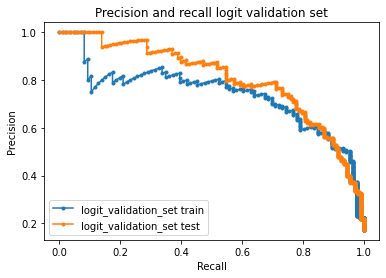

===== test ======
>>f1 score: 0.733 (train) 0.708 (test)
>>auc: 0.843 (train) 0.805 (test)


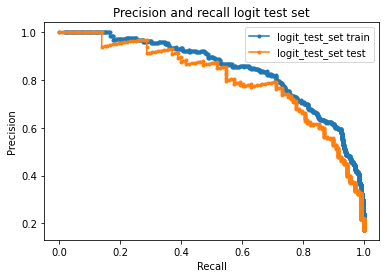

<Figure size 432x288 with 0 Axes>

In [20]:
# lr with all variables
lr = LogisticRegression(class_weight=cw_dict,
                  max_iter=1000,
                  random_state=seed)
lr.fit(X_train, y_train["TARGET"])
lr_scores = evaluate_model(lr, X_train, y_train["TARGET"], seed)
print("F1 score (train with k fold) %.3f" % mean(lr_scores))

# validation
print("===== Validation ======")
calculate_precision_recall_curve(
      lr,
      X_val,
      y_val["TARGET"],
      X_test,
      y_test["TARGET"], 
    "logit_validation_set"
 )

# test
print("===== test ======")
calculate_precision_recall_curve(
      lr,
      X_train,
      y_train["TARGET"],
      X_test,
      y_test["TARGET"],
    "logit_test_set"
 )


# F1 score (train with k fold) 0.678
#  >>f1 score: 0.739 (train) 0.726 (test)
#  >>auc: 0.841 (train) 0.831 (test)

In [21]:
df_results_logit = y_val.copy(deep=True)
df_results_logit["y_pred"] = lr.predict(X_val)

In [22]:
df_results_logit["flag_wrong_pred"] = np.where(
    df_results_logit["TARGET"]!= df_results_logit["y_pred"], 1, 0)

In [23]:
make_confusion_matrix(y_val, lr.predict(X_val), "logit_validation_set", labels=None)
make_confusion_matrix(y_test, lr.predict(X_test), "logit_test_set", labels=None)

In [27]:
# false positive, false negative using base line model
df_FP_FN = df_results_logit[df_results_logit["flag_wrong_pred"] == 1]
df_FP_FN = df_FP_FN.rename(columns={'TARGET': 'y_valid'}).reset_index()
states_FP_FN = df_FP_FN["STATE_NAME"].unique().tolist()
counties_FP_FN = df_FP_FN["COUNTY_FIPS"].unique().tolist()

In [28]:
df_FP_FN

STATE_NAME  COUNTY_FIPS  y_valid  y_pred  flag_wrong_pred
0            MAINE        23031        1       0                1
1       WASHINGTON        53009        1       0                1
2        LOUISIANA        22099        0       1                1
3         COLORADO         8077        0       1                1
4         MICHIGAN        26073        0       1                1
..             ...          ...      ...     ...              ...
57           TEXAS        48137        0       1                1
58  NORTH CAROLINA        37099        0       1                1
59        VIRGINIA        51790        1       0                1
60        MARYLAND        24035        0       1                1
61         ALABAMA         1109        0       1                1

[62 rows x 5 columns]

In [29]:
states_train = y_train.reset_index()["STATE_NAME"].unique().tolist()
counties_train = y_train.reset_index()["COUNTY_FIPS"].unique().tolist()

In [30]:
# States in validation set but not in the train set 
[state for state in states_FP_FN if state not in states_train]

[]

In [31]:
# counties in validation set but not in the train set 
[county for county in counties_FP_FN if county not in counties_train]

[23031,
 53009,
 22099,
 8077,
 26073,
 48413,
 35043,
 13219,
 39099,
 13101,
 30023,
 8041,
 27019,
 6029,
 47093,
 6027,
 6007,
 26047,
 31045,
 30035,
 27003,
 51025,
 42011,
 32031,
 55105,
 24017,
 13265,
 4027,
 28149,
 47141,
 36095,
 37133,
 53071,
 13007,
 13123,
 36033,
 1131,
 13191,
 13209,
 54061,
 48311,
 8007,
 48485,
 8035,
 36103,
 33001,
 27169,
 42079,
 51103,
 41053,
 9015,
 51595,
 37155,
 17005,
 48127,
 13081,
 35029,
 48137,
 37099,
 51790,
 24035,
 1109]

# Modelisation with all variables 

>LogisticRegression 0.663 (train k fold) 0.708 (test)
>>f1 score: 0.733 (train) 0.687 (test)
>>auc: 0.843 (train) 0.740 (test)


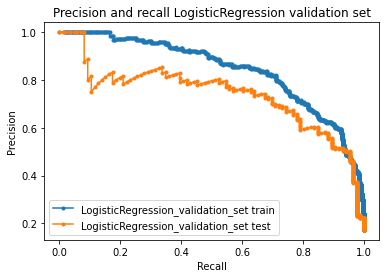

>>f1 score: 0.733 (train) 0.708 (test)
>>auc: 0.843 (train) 0.805 (test)


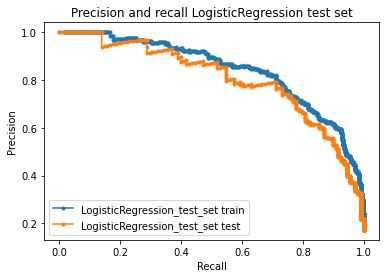

>SVM 0.657 (train k fold) 0.695 (test)
>>f1 score: 0.730 (train) 0.676 (test)
>>auc: 0.821 (train) 0.700 (test)


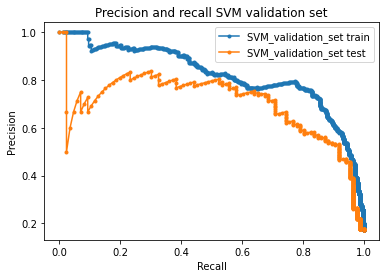

>>f1 score: 0.730 (train) 0.695 (test)
>>auc: 0.821 (train) 0.773 (test)


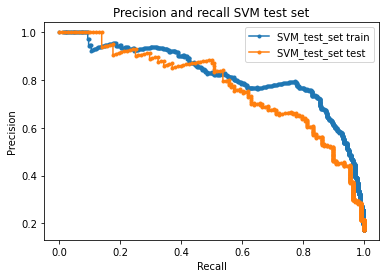

>BaggingClassifier 0.652 (train k fold) 0.618 (test)
>>f1 score: 1.000 (train) 0.698 (test)
>>auc: 1.000 (train) 0.782 (test)


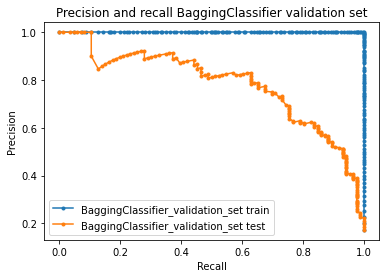

>>f1 score: 1.000 (train) 0.618 (test)
>>auc: 1.000 (train) 0.786 (test)


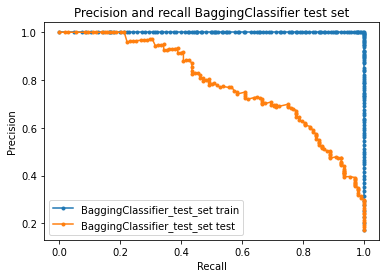

>BalancedBaggingClassifier 0.640 (train k fold) 0.680 (test)
>>f1 score: 0.852 (train) 0.654 (test)
>>auc: 0.957 (train) 0.715 (test)


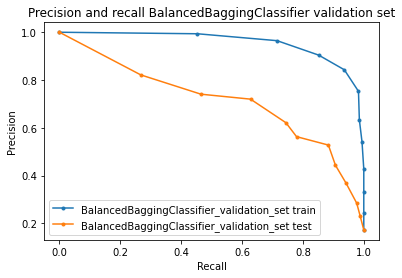

>>f1 score: 0.852 (train) 0.680 (test)
>>auc: 0.957 (train) 0.760 (test)


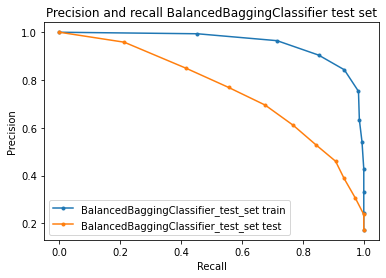

>RandomForestClassifier 0.625 (train k fold) 0.647 (test)
>>f1 score: 0.672 (train) 0.648 (test)
>>auc: 0.766 (train) 0.704 (test)


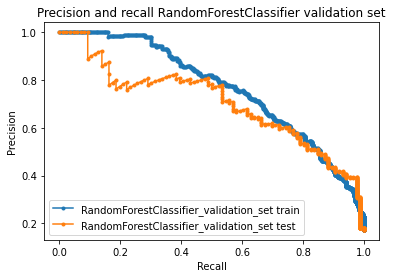

>>f1 score: 0.672 (train) 0.647 (test)
>>auc: 0.766 (train) 0.718 (test)


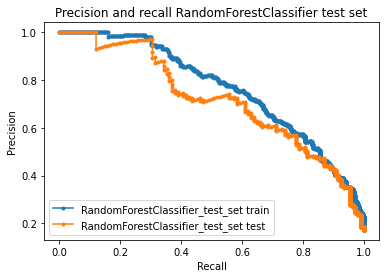

>GradientBoosting 0.664 (train k fold) 0.730 (test)
>>f1 score: 1.000 (train) 0.712 (test)
>>auc: 1.000 (train) 0.782 (test)


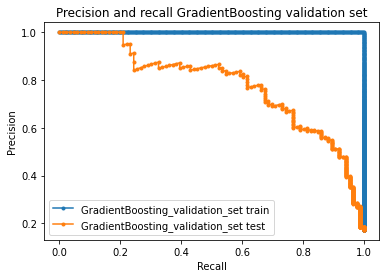

>>f1 score: 1.000 (train) 0.730 (test)
>>auc: 1.000 (train) 0.821 (test)


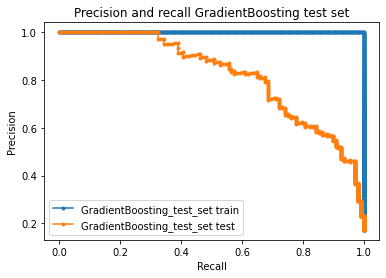

>XGBClassifier 0.668 (train k fold) 0.630 (test)
>>f1 score: 1.000 (train) 0.718 (test)
>>auc: 1.000 (train) 0.803 (test)


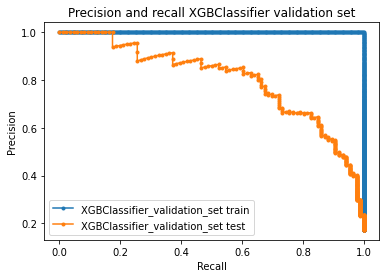

>>f1 score: 1.000 (train) 0.630 (test)
>>auc: 1.000 (train) 0.803 (test)


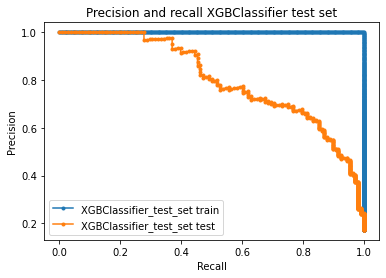

<Figure size 432x288 with 0 Axes>

In [34]:
results_train_all, results_test_all, names = list(), list(), list()
# Boucler sur chacun des modèles
for name, model in models.items():
    fit_m = fit_model(X_train, y_train["TARGET"], model)
    scores_train_all = evaluate_model(fit_m, X_train, y_train["TARGET"], seed)
    y_pred_test = fit_m.predict(X_test)
    F1_test = f1_score(y_test["TARGET"], y_pred_test)
    results_train_all.append(scores_train_all)
    results_test_all.append(F1_test)
    names.append(name)
    print('====== %s %.3f (train k fold) %.3f (test) ======' % (name, mean(scores_train_all), F1_test))
    calculate_precision_recall_curve(
      fit_m,
      X_train,
      y_train["TARGET"],
      X_val,
      y_val["TARGET"],
      f'{name}_validation_set'
    )
    
    calculate_precision_recall_curve(
      fit_m,
      X_train,
      y_train["TARGET"],
      X_test,
      y_test["TARGET"],
      f'{name}_test_set'
    )
    

# >LogisticRegression 0.713 (train k fold) 0.693 (test)
# >BaggingClassifier 0.714 (train k fold) 0.706 (test)
# >BalancedBaggingClassifier 0.689 (train k fold) 0.614 (test)
# >RandomForestClassifier 0.640 (train k fold) 0.622 (test)
# >GradientBoosting 0.722 (train k fold) 0.674 (test)
# >XGBClassifier 0.729 (train k fold) 0.653 (test)


# >LogisticRegression 0.674 (train k fold) 0.726 (test)
## >>f1 score: 0.739 (train) 0.726 (test)

# >SVM 0.656 (train k fold) 0.667 (test)
## >>f1 score: 0.686 (train) 0.667 (test)

# >BaggingClassifier 0.703 (train k fold) 0.696 (test)
## >>f1 score: 1.000 (train) 0.696 (test)

# >BalancedBaggingClassifier 0.657 (train k fold) 0.667 (test)
##  >>f1 score: 0.840 (train) 0.667 (test)

# >RandomForestClassifier 0.639 (train k fold) 0.644 (test)
## >>f1 score: 0.683 (train) 0.644 (test)

# >GradientBoosting 0.695 (train k fold) 0.698 (test)
## >>f1 score: 0.995 (train) 0.698 (test)

# >XGBClassifier 0.692 (train k fold) 0.716 (test)
## >>XGBClassifier 0.692 (train k fold) 0.716 (test)

- Best results: Logistic regression and SVC have low overfitting
- GB, XGB

###  Kbest

In [36]:
KBest_features = feature_selection_kbest(X_train, y_train["TARGET"], 50)

50 most important features according to <<Kbest method>>
['ESTIMATES_BASE_2010', 'N_POP_CHG_2010', 'GQ_ESTIMATES_2012', 'PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1990', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000', 'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19', 'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19', 'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19', 'RESIDUAL_2011', 'RESIDUAL_2018', 'RESIDUAL_2016', 'RESIDUAL_2017', 'RESIDUAL_2019', 'RESIDUAL_2010', 'RESIDUAL_2015', 'RESIDUAL_2013', 'RESIDUAL_2014', 'RESIDUAL_2012', 'INTERNATIONAL_MIG_2015', 'DOMESTIC_MIG_2010', 'NET_MIG_2010', 'DOMESTIC_MIG_2011', 'NET_MIG_2011', 'DOMESTIC_MIG_2012', 'NET_MIG_2012', 'DOMESTIC_MIG_2015', 'NET_MIG_2016', 'UNEMPLOYED_2019', 'CI90LB517_2019', 'R_INTERNATIONAL_MIG_2019', 'R_INTERNATIONAL_MIG_2014', 'R_INTERNATIONAL_MIG_2013', 'R_INTERNATIONAL_MIG_2012', 'R_INTERN

F1 score (train with kfold)  0.608
>>f1 score: 0.649 (train) 0.601 (test)
>>auc: 0.765 (train) 0.716 (test)


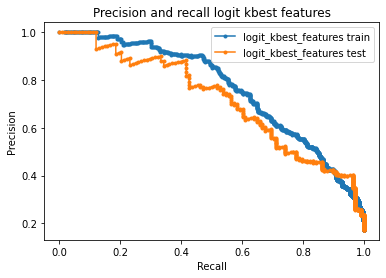

<Figure size 432x288 with 0 Axes>

In [40]:
# lr with only a few variables
lr = LogisticRegression(class_weight=cw_dict,
                  max_iter=1000,
                  random_state=seed)
lr.fit(X_train[KBest_features], y_train["TARGET"])
lr_scores = evaluate_model(lr, X_train[KBest_features], y_train["TARGET"], seed)
print("F1 score (train with kfold)  %.3f" % mean(lr_scores))

calculate_precision_recall_curve(
      lr,
      X_train[KBest_features],
      y_train["TARGET"],
      X_test[KBest_features],
      y_test["TARGET"],
      "logit_kbest_features"
 )

- Performance worsen with kbest features

# Exploring RFE

###  - RFE with different base algorithms

In [41]:
# option 1 : definir le nb de features et appliquer decision trees
# get a list of models to evaluate
def get_models(weights=cw_dict, n_features=50):
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(class_weight=weights), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['lr'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(class_weight=weights), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['cart'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(class_weight=weights), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s', rfe), ('m', model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['gbm'] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models


# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
#     scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
#     return scores


# # get the models to evaluate
# models_rfe = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# start = time.time()
# for name, model in models_rfe.items():
#     scores = evaluate_model(model, X_train, y_train["TARGET"])
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# end = time.time()
# delta = (end - start) / 60
# print(f"modelisation took {delta:.2} minutes")

# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.savefig("images/model_performance_RFE")

There seems to be almost no difference between the different methods

## - Exploring RFE with CV integrated for feature selection. Then model with different algorithms 

In [44]:
estimator = RandomForestClassifier(class_weight=cw_dict, n_jobs=-1, max_depth=3)
# fit random forest with RFE to select variables
rfe_RF_features_10 = compute_rfecv(
    X_train, y_train["TARGET"], estimator=estimator, min_features=10
)
print('>The selected features by RFE are : \n %s' % (rfe_RF_features_10))

NameError: name 'rfe_RF_features' is not defined

In [45]:
# fit random forest with RFE to select variables
rfe_RF_features_20 = compute_rfecv(X_train,
                                y_train["TARGET"],
                                estimator=estimator,
                                min_features=20)
print('>The selected features by RFE are : \n %s' % (rfe_RF_features_20))

>The selected features by RFE are : 
 ['ESTIMATES_BASE_2010', 'GQ_ESTIMATES_2012', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970', 'PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1980', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1990', 'PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2000', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000', 'PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000', 'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19', 'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19', 'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19', 'PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19', 'PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19', 'MED_HH_INCOME_PERCENT_OF_STATE_TOTAL_2019', 'RESIDUAL_2011', 'UNEMPLOYMENT_RATE_2018', 'UNEMPLOYMENT_RATE_2000', 'UNEMPLOYMENT_RATE_2006', '

In [47]:
results_train_20, results_test_20, names = list(), list(), list()
# Boucler sur chacun des modèles
for name, model in models.items():
    fit_m = fit_model(X_train[rfe_RF_features_20], y_train["TARGET"], model)
    scores_train_20 = evaluate_model(
        fit_m, X_train[rfe_RF_features_20], y_train["TARGET"], seed
    )
    y_pred_test = fit_m.predict(X_test[rfe_RF_features_20])
    F1_test = f1_score(y_test["TARGET"], y_pred_test)
    results_train_20.append(scores_train_20)
    results_test_20.append(F1_test)
    names.append(name)
    print('>%s %.3f (train kbest) %.3f (test)' % (name, mean(scores_train_20), F1_test))

# 10 vars exp
#>LogisticRegression 0.646 (train) 0.701 (test)
#>BaggingClassifier 0.686 (train) 0.695 (test)
#>BalancedBaggingClassifier 0.663 (train) 0.675 (test)
#>RandomForestClassifier 0.640 (train) 0.680 (test)
#>GradientBoosting 0.675 (train) 0.714 (test)
#>XGBClassifier 0.686 (train) 0.663 (test)

>LogisticRegression 0.670 (train kbest) 0.709 (test)
>SVM 0.669 (train kbest) 0.703 (test)
>BaggingClassifier 0.662 (train kbest) 0.641 (test)
>BalancedBaggingClassifier 0.637 (train kbest) 0.644 (test)
>RandomForestClassifier 0.626 (train kbest) 0.655 (test)
>GradientBoosting 0.673 (train kbest) 0.697 (test)
>XGBClassifier 0.668 (train kbest) 0.623 (test)


- Logit and SVC are the best models

# Boruta

In [ ]:
estimator = RandomForestClassifier(class_weight=cw_dict, n_jobs=-1, max_depth=3)
boruta_features = compute_boruta(X_train, y_train["TARGET"], estimator, 'auto')
boruta_features

In [ ]:
len(X_train.columns)

In [ ]:
len(boruta_features)

>LogisticRegression 0.680 (train kfold) 0.722 (test)

 >>f1 score: 0.727 (train) 0.722 (test)


 >>auc: 0.833 (train) 0.833 (test)


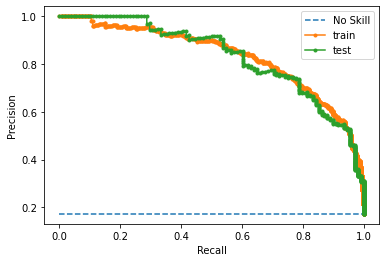

>SVM 0.661 (train kfold) 0.661 (test)

 >>f1 score: 0.686 (train) 0.661 (test)


 >>auc: 0.798 (train) 0.745 (test)


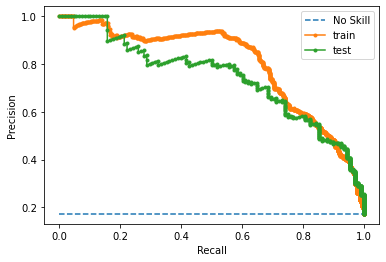

>BaggingClassifier 0.703 (train kfold) 0.674 (test)

 >>f1 score: 1.000 (train) 0.674 (test)


 >>auc: 1.000 (train) 0.824 (test)


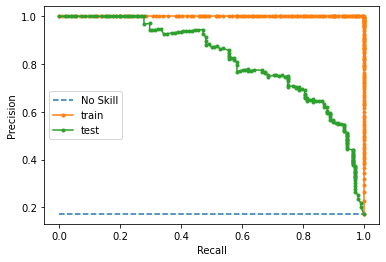

>BalancedBaggingClassifier 0.645 (train kfold) 0.716 (test)

 >>f1 score: 0.853 (train) 0.716 (test)


 >>auc: 0.971 (train) 0.743 (test)


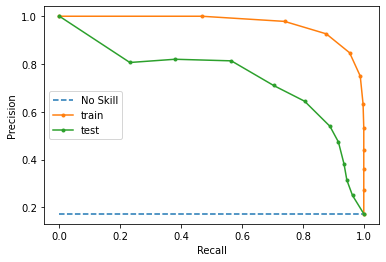

>RandomForestClassifier 0.632 (train kfold) 0.667 (test)

 >>f1 score: 0.679 (train) 0.667 (test)


 >>auc: 0.776 (train) 0.742 (test)


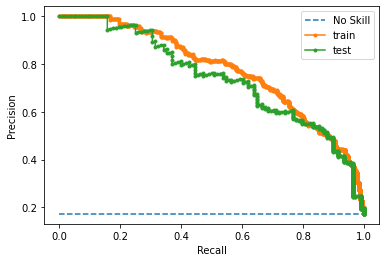

>GradientBoosting 0.694 (train kfold) 0.684 (test)

 >>f1 score: 0.995 (train) 0.684 (test)


 >>auc: 1.000 (train) 0.839 (test)


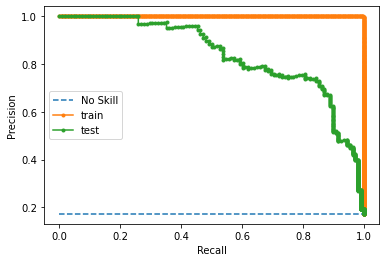

>XGBClassifier 0.687 (train kfold) 0.712 (test)

 >>f1 score: 0.996 (train) 0.712 (test)


 >>auc: 1.000 (train) 0.847 (test)


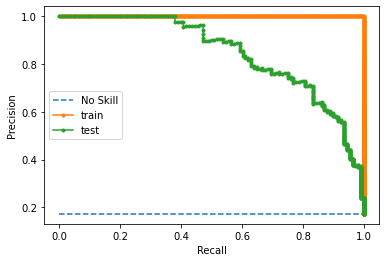

In [22]:
results_train_boruta, results_test_boruta, names_boruta = list(), list(), list()
# Boucler sur chacun des modèles
for name, model in models.items():
    fit_m = fit_model(X_train[boruta_features], y_train["TARGET"], model)
    scores_train = evaluate_model(fit_m, X_train[boruta_features], y_train["TARGET"])
    y_pred_test = fit_m.predict(X_test[boruta_features])
    F1_test = f1_score(y_test["TARGET"], y_pred_test)
    results_train_boruta.append(scores_train)
    results_test_boruta.append(F1_test)
    names_boruta.append(name)
    print('>%s %.3f (train kfold) %.3f (test)' % (name, mean(scores_train), F1_test))
    
    calculate_precision_recall_curve(
      fit_m,
      X_train[boruta_features],
      y_train["TARGET"],
      X_test[boruta_features],
      y_test["TARGET"]
 )
    
# >LogisticRegression 0.680 (train kfold) 0.722 (test)
#  >>f1 score: 0.727 (train) 0.722 (test)

# >SVC 0.661 (train kfold) 0.661 (test)
#  >>f1 score: 0.686 (train) 0.661 (test)
        
# >BaggingClassifier 0.703 (train kfold) 0.674 (test)
#  >>f1 score: 1.000 (train) 0.674 (test)
        
# >BalancedBaggingClassifier 0.645 (train kfold) 0.716 (test)
#  >>f1 score: 0.853 (train) 0.716 (test)
        
# >RandomForestClassifier 0.632 (train kfold) 0.667 (test)
#  >>f1 score: 0.679 (train) 0.667 (test)
        
# >GradientBoosting 0.694 (train kfold) 0.684 (test)
#  >>f1 score: 0.995 (train) 0.684 (test)
        
# >XGBClassifier 0.687 (train kfold) 0.712 (test)
#  >>f1 score: 0.996 (train) 0.712 (test)

#  Grid search 

In [42]:
params_grid = {
#     "LogisticRegression":
#         {'solver': ['liblinear', 'lbfgs'],
#          'class_weight': [cw_dict, 'balanced']
#          },
        "SVC":
          {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
           'C': [2, 1.5, 1, 0.5],
           'gamma':['scale', 'auto']
          },    
#     "BalancedBaggingClassifier":
#         {'n_estimators': [5, 10, 15 ],
#          'max_features': [1, 3],
         #'max_samples': [1, 2, 3]
#       } ,
#     "RandomForestClassifier":
#         {'n_estimators': [350],
#          'min_samples_split':[5],
#          'max_depth': [3],
#          'min_samples_leaf':[3]
#         },
#     "XGBClassifier":
#        {
#            'gamma': [0.3],
#            'learning_rate': [0.005, 0.01],
#                'max_depth': [3, 4, 5],
#                'n_estimators': [80,100,200],
#                'reg_alpha': [0.2, 0.4],
#                'reg_lambda': [0.4],
#         'scale_pos_weight' : [None,60,80,90]
#              }
}


estimators = {
#     "LogisticRegression":
#         LogisticRegression(
#             max_iter=1000,
#             random_state=seed,
#             class_weight=cw_dict
#         ),
       "SVC":
    SVC(
        
        class_weight=cw_dict,
        probability=True
    ),
    
    
#     "BalancedBaggingClassifier":
#         BalancedBaggingClassifier(
#             random_state=seed,
#         ),
#     "RandomForestClassifier":
#         RandomForestClassifier(
#             class_weight=cw_dict,
#             random_state=seed,
#          ),
#     "XGBClassifier":
#         XGBClassifier(
#             eval_metric='logloss',
#             random_state=seed,
#         )
}


SVC
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [2, 1.5, 1, 0.5], 'gamma': ['scale', 'auto']}
SVC(class_weight={0: 0.6044196211753279, 1: 2.894186046511628},
    probability=True)
>SVC:
Fitting 10 folds for each of 32 candidates, totalling 320 fits

 >>f1 score: 0.944 (train) 0.689 (test)


 >>auc: 0.987 (train) 0.682 (test)


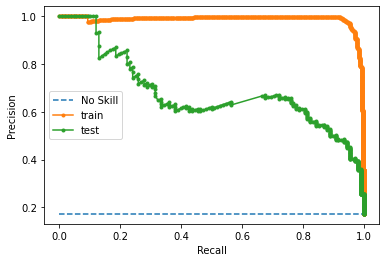

SVC(C=2, class_weight={0: 0.6044196211753279, 1: 2.894186046511628},
    gamma='auto', probability=True)
0.7118125857312394


In [43]:
# grid search for boruta
for key in set(params_grid.keys()) & set(estimators.keys()):
    print(key)
    print(params_grid[key])
    print(estimators[key])
    print('>%s:' % (key))
    gridSearch_best_model(params_grid[key],
                          estimators[key],
                          X_train[boruta_features],
                          y_train["TARGET"],
                          X_test[boruta_features],
                          y_test["TARGET"]
                         )



XGBClassifier
{'gamma': [0.3], 'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [50], 'reg_alpha': [0.4], 'reg_lambda': [0.4]}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=123, ...)
>XGBClassifier:
Fitting 10 folds for each of 1 candidates, totalling 10 fits

 >>f1 score: 0.759 (train) 0.

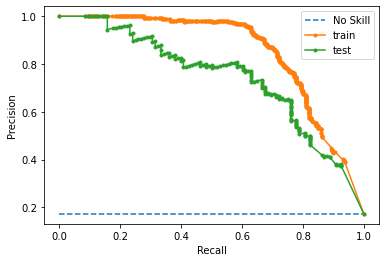

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123, ...)
0.6284186389593744
{'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'reg_alpha': 0.4, 'reg_lambda': 0.4}
{'mean_fit_time': array([1.76418364]), 'std_fit_time': array([0.10549605]), 'mean_score_time': array([0.01341228]), 'std_score_time': array([0.00237501]), 

In [90]:
for key in set(params_grid.keys()) & set(estimators.keys()):
    print(key)
    print(params_grid[key])
    print(estimators[key])
    print('>%s:' % (key))
    gridSearch_best_model(params_grid[key],
                          estimators[key],
                          X_train,
                          y_train["TARGET"],
                          X_test,
                          y_test["TARGET"]
                         )

In [ ]:
for key in set(params_grid.keys()) & set(estimators.keys()):
    print(key)
    print(params_grid[key])
    print(estimators[key])
    print('>%s:' % (key))
    gridSearch_best_model(params_grid[key],
                          estimators[key],
                          X_train[rfe_RF_features],
                          y_train["TARGET"],
                          X_test[rfe_RF_features],
                          y_test["TARGET"]
                         )

